# Stanford 40
### Download the data
You can see the zip files if you click the Files tab (looks like a folder symbol on the left of the screen)

### Unzip it

## Read the train and test splits, combine them and make better splits to help training networks easier.

In [2]:
from collections import Counter
from sklearn.model_selection import train_test_split

keep_stanford40 = ["applauding", "climbing", "drinking", "jumping", "pouring_liquid", "riding_a_bike", "riding_a_horse", 
        "running", "shooting_an_arrow", "smoking", "throwing_frisby", "waving_hands"]
with open('Stanford40/ImageSplits/train.txt', 'r') as f:
    # We won't use these splits but split them ourselves
    train_files = [file_name for file_name in list(map(str.strip, f.readlines())) if '_'.join(file_name.split('_')[:-1]) in keep_stanford40]
    train_labels = ['_'.join(name.split('_')[:-1]) for name in train_files]

with open('Stanford40/ImageSplits/test.txt', 'r') as f:
    # We won't use these splits but split them ourselves
    test_files = [file_name for file_name in list(map(str.strip, f.readlines())) if '_'.join(file_name.split('_')[:-1]) in keep_stanford40]
    test_labels = ['_'.join(name.split('_')[:-1]) for name in test_files]

# Combine the splits and split for keeping more images in the training set than the test set.
all_files = train_files + test_files
all_labels = train_labels + test_labels
train_files, test_files = train_test_split(all_files, test_size=0.1,random_state=0, stratify=all_labels)
train_labels = ['_'.join(name.split('_')[:-1]) for name in train_files]
test_labels = ['_'.join(name.split('_')[:-1]) for name in test_files]
print(f'Train files ({len(train_files)}):\n\t{train_files}')
print(f'Train labels ({len(train_labels)}):\n\t{train_labels}\n'\
      f'Train Distribution:{list(Counter(sorted(train_labels)).items())}\n')
print(f'Test files ({len(test_files)}):\n\t{test_files}')
print(f'Test labels ({len(test_labels)}):\n\t{test_labels}\n'\
      f'Test Distribution:{list(Counter(sorted(test_labels)).items())}\n')
action_categories = sorted(list(set(train_labels)))
print(f'Action categories ({len(action_categories)}):\n{action_categories}')

Train files (2733):
	['drinking_203.jpg', 'smoking_048.jpg', 'running_099.jpg', 'jumping_186.jpg', 'smoking_205.jpg', 'riding_a_bike_090.jpg', 'climbing_184.jpg', 'throwing_frisby_078.jpg', 'applauding_185.jpg', 'throwing_frisby_131.jpg', 'running_241.jpg', 'riding_a_horse_229.jpg', 'throwing_frisby_009.jpg', 'climbing_126.jpg', 'waving_hands_188.jpg', 'shooting_an_arrow_062.jpg', 'riding_a_horse_191.jpg', 'applauding_087.jpg', 'applauding_074.jpg', 'riding_a_bike_181.jpg', 'running_091.jpg', 'riding_a_bike_188.jpg', 'riding_a_bike_027.jpg', 'throwing_frisby_035.jpg', 'climbing_022.jpg', 'applauding_095.jpg', 'waving_hands_024.jpg', 'running_225.jpg', 'climbing_224.jpg', 'riding_a_bike_108.jpg', 'running_050.jpg', 'jumping_089.jpg', 'pouring_liquid_089.jpg', 'climbing_087.jpg', 'applauding_143.jpg', 'jumping_069.jpg', 'waving_hands_039.jpg', 'smoking_019.jpg', 'drinking_030.jpg', 'running_189.jpg', 'climbing_159.jpg', 'climbing_221.jpg', 'drinking_162.jpg', 'drinking_210.jpg', 'riding_

### Visualize a photo from the training files and also print its label

An image with the label - riding_a_bike


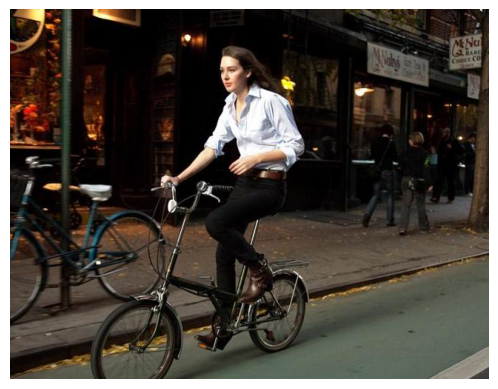

In [3]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

image_no = 234  # change this to a number between [0, 1200] and you can see a different training image
img = cv2.imread(f'Stanford40/JPEGImages/{train_files[image_no]}')
print(f'An image with the label - {train_labels[image_no]}')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Human Motion Database 51 (HMDB51)
### Download the dataset

# Split HMD into train and test

In [15]:
import os
import glob

keep_hmdb51 = ["clap", "climb", "drink", "jump", "pour", "ride_bike", "ride_horse", 
        "run", "shoot_bow", "smoke", "throw", "wave"]

TRAIN_TAG, TEST_TAG = 1, 2
train_files, test_files = [], []
train_labels, test_labels = [], []
split_pattern_name = f"*test_split1.txt"
split_pattern_path = os.path.join('test_train_splits', split_pattern_name)
annotation_paths = glob.glob(split_pattern_path)
for filepath in annotation_paths:
    print(filepath)
    class_name = '_'.join(filepath.split('\\')[-1].split('_')[:-2])
    if class_name not in keep_hmdb51:
        continue  # skipping the classes that we won't use.
    with open(filepath) as fid:
        lines = fid.readlines()
        print(lines)
    for line in lines:
        video_filename, tag_string = line.split()
        tag = int(tag_string)
        if tag == TRAIN_TAG:
            train_files.append(video_filename)
            train_labels.append(class_name)
        elif tag == TEST_TAG:
            test_files.append(video_filename)
            test_labels.append(class_name)

print(f'Train files ({len(train_files)}):\n\t{train_files}')
print(f'Train labels ({len(train_labels)}):\n\t{train_labels}\n'\
      f'Train Distribution:{list(Counter(sorted(train_labels)).items())}\n')
print(f'Test files ({len(test_files)}):\n\t{test_files}')
print(f'Test labels ({len(test_labels)}):\n\t{test_labels}\n'\
      f'Test Distribution:{list(Counter(sorted(test_labels)).items())}\n')
action_categories = sorted(list(set(train_labels)))
print(f'Action categories ({len(action_categories)}):\n{action_categories}')

test_train_splits\clap_test_split1.txt
['#20_Rhythm_clap_u_nm_np1_fr_goo_0.avi 1 \n', '#20_Rhythm_clap_u_nm_np1_fr_goo_1.avi 1 \n', '#20_Rhythm_clap_u_nm_np1_fr_goo_2.avi 1 \n', '#20_Rhythm_clap_u_nm_np1_le_goo_3.avi 1 \n', '#20_Rhythm_clap_u_nm_np1_le_goo_4.avi 1 \n', '#20_Rhythm_clap_u_nm_np1_le_goo_5.avi 0 \n', '103_years_old_japanese_woman__Nao_is_clapping_with_piano_music_by_beethoven_clap_u_cm_np1_fr_med_1.avi 2 \n', '103_years_old_japanese_woman__Nao_is_clapping_with_piano_music_by_beethoven_clap_u_nm_np1_fr_med_0.avi 2 \n', 'A_Round_of_Applause_clap_u_cm_np1_fr_med_0.avi 1 \n', 'A_Round_of_Applause_clap_u_cm_np1_fr_med_1.avi 1 \n', 'Aishwarya_Rai_Burns_David_Letterman_in_his_own_show_clap_u_cm_np1_fr_bad_1.avi 2 \n', 'Alex_applauding_himself_clap_u_cm_np1_fr_med_1.avi 2 \n', 'Alex_applauding_himself_clap_u_nm_np1_fr_med_0.avi 2 \n', 'Applauding_Abby_clap_u_nm_np1_fr_med_0.avi 1 \n', 'Applauding_Abby_clap_u_nm_np1_fr_med_1.avi 1 \n', 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_m

# Load data into dataloaders with necessary transforms

In [6]:
for file_name in sorted(os.listdir('test_train_splits')):
  if 'train' in file_name:
    print(file_name)
# train_files, test_files = train_test_split(all_files, test_size=0.1,random_state=0, stratify=all_labels)
# train_labels = ['_'.join(name.split('_')[:-1]) for name in train_files]
# test_labels = ['_'.join(name.split('_')[:-1]) for name in test_files]

FileNotFoundError: [WinError 3] Het systeem kan het opgegeven pad niet vinden: 'test_train_splits'

# Let's print the data shape with batch size 16 and 16 frames.

In [ ]:
for data, _, labels in train_loader:
  print(data.shape)  # 16-batch size, 3-channels, 16-frames, 172x172-crop
  print(labels)  # 12 classes [0-11]